# Logistic Regression

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
df=pd.read_csv('HR_comma_sep.csv') #load data
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [111]:
df.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [112]:
df.isna().sum() #checking null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [113]:
df.duplicated().sum()

3008

In [114]:
df_left=df[df.left==1]
df_left.shape

(3571, 10)

In [115]:
df_not_left=df[df.left==0]
df_not_left.shape

(11428, 10)

In [116]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Data visualization

In [117]:
import seaborn as sns

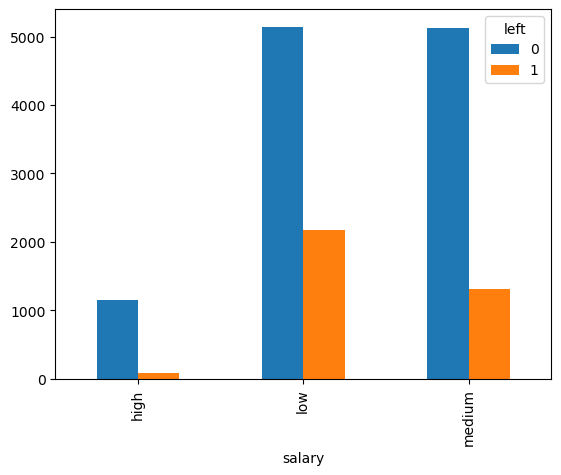

In [118]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.show()

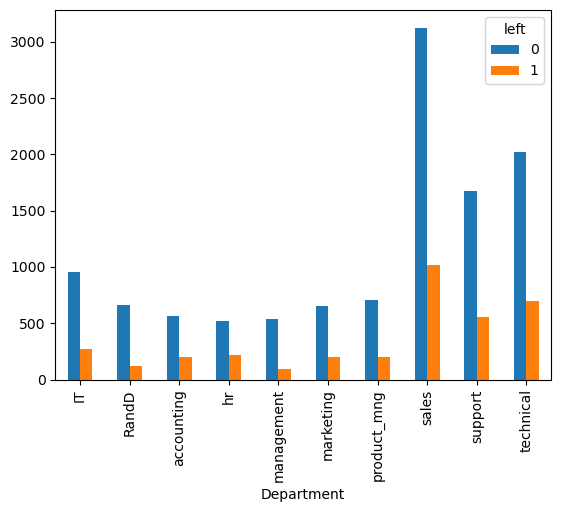

In [119]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.show()

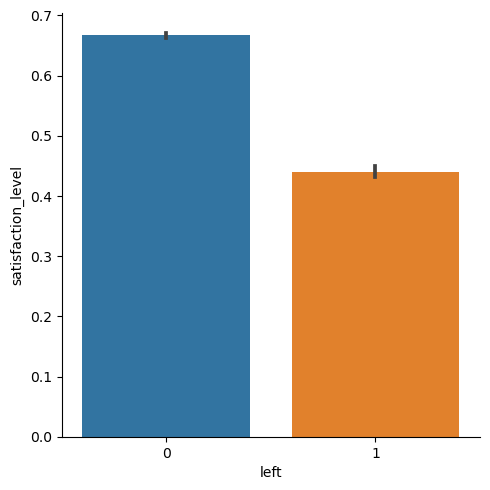

In [120]:
sns.catplot(data=df,x='left',y='satisfaction_level',kind='bar')
plt.show()

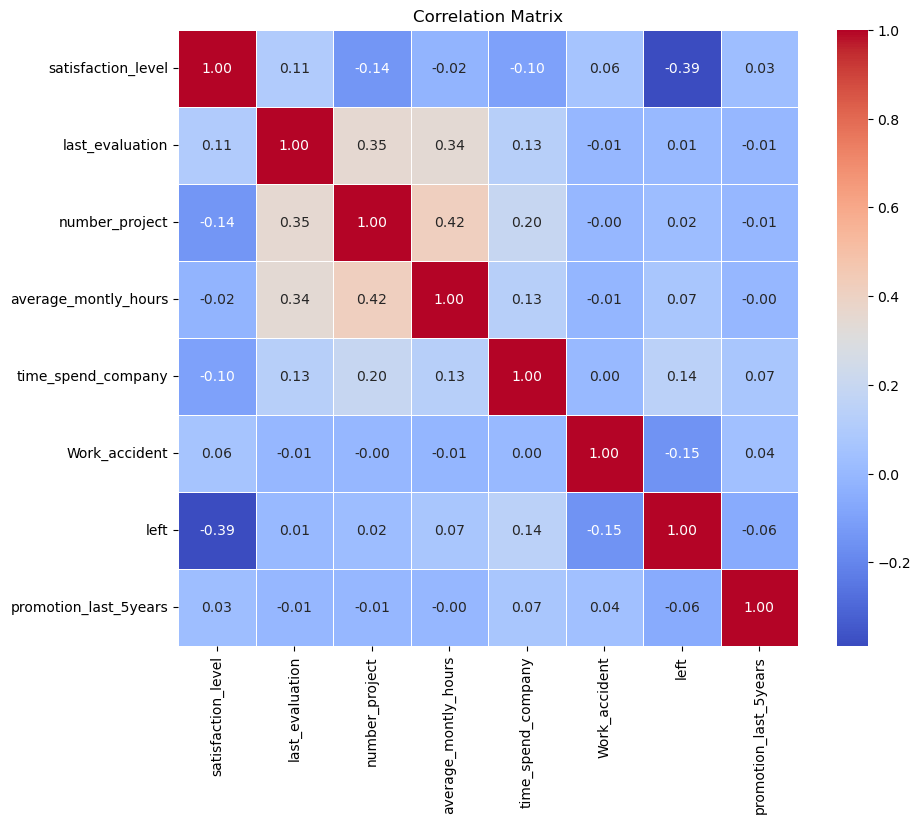

In [121]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [122]:
#One hot encoding
df_encoded = pd.get_dummies(df, columns=['salary'], prefix=['salary'])
print(df_encoded)
df_encoded.head()

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [123]:
#One hot encoding
from sklearn.preprocessing import MinMaxScaler

In [124]:
df_encoded.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dtype: object

In [125]:
df_encoded=df_encoded.drop(['Department'],axis=1)

In [126]:
scaler=MinMaxScaler()
df_normalized=scaler.fit_transform(df_encoded)
df_normalized=pd.DataFrame(df_normalized, columns=df_encoded.columns)

In [127]:
df_normalized

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0,0.0,1.0,0.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0,0.0,1.0,0.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0,0.0,1.0,0.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0,0.0,1.0,0.0


In [128]:
X=df_normalized.drop(['left'],axis=1)
y=df_normalized['left']

# Model Building

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [134]:
model=LogisticRegression()
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3)
model.fit(X_train,y_train)

LogisticRegression()

In [137]:
y_pred=model.predict(X_test)

In [138]:
model.score(X_test,y_test)

0.7942222222222223

In [139]:
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f'Accuracy:{accuracy}')
print(f'confusion:{confusion}')
print(f'report:{report}')


Accuracy:0.7942222222222223
confusion:[[3198  238]
 [ 688  376]]
report:              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      3436
         1.0       0.61      0.35      0.45      1064

    accuracy                           0.79      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

